# The mathematical building blocks of neural networks

This chapter covers
* A first example of a neural network
* Tensors and tensor operations
* How neural networks learn via backpropagation and gradient descent

## A first look at a neural network

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-01.png" width="300"><p style="text-align:center">Figure 2.1 MNIST sample digits</p>

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2556 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0496 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0371 - accuracy: 0.9887


**Using the model to make predictions**

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([2.3782842e-09, 5.3857929e-12, 2.0797486e-07, 5.9503855e-06,
       5.5039068e-13, 2.8133682e-09, 1.9825971e-15, 9.9999368e-01,
       8.5928544e-09, 9.4413700e-08], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9999937

In [56]:
test_labels[0]

7

**Evaluating the model on new data**

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
#print(f"test_acc: {test_acc}")

ValueError: in user code:

    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\User\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28, 28)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
      • training=False
      • mask=None


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

### Vectors (rank-1 tensors)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

### Matrices (rank-2 tensors)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

A tensor is defined by three key attributes:

* **Number of axes (rank)** — For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.

* **Shape** — This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().

* **Data type (usually called dtype in Python libraries)** — This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

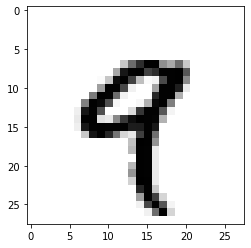

In [27]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [29]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[:, 14:, 14:]

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

일반적으로 딥 러닝에서 접하게 되는 모든 데이터 텐서의 첫 번째 축(인덱싱이 0에서 시작하기 때문에 축 0)은 샘플 축(샘플 차원이라고도 함)이 됩니다. MNIST 예에서 "샘플"은 숫자 이미지입니다.

또한 딥 러닝 모델은 전체 데이터 세트를 한 번에 처리하지 않습니다. 오히려 데이터를 작은 배치(batch)로 나눕니다. 구체적으로 다음은 배치 크기가 128인 MNIST 숫자의 배치입니다.

In [34]:
batch = train_images[:128]

In [35]:
batch = train_images[128:256]

In [36]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

조작할 데이터는 거의 항상 다음 범주 중 하나에 속합니다.

* **벡터(vector) 데이터** - shape (samples, features)의 2 rank 텐서, 여기서 각 샘플은 숫자 속성("features")의 벡터입니다. 
* **시계열 데이터 또는 시퀀스 데이터** - 각 샘플이 특징 벡터의 시퀀스(frames 길이의)인 shape (samples, timesteps, features)의 rank 3 텐서
* **이미지(image)** - shape (samples, height, width, channels)의 rank 4 텐서, 여기서 각 샘플은 픽셀의 2D 그리드이고 각 픽셀은 값 벡터("channels")로 표시됩니다.
* **비디오(video)** — 각 샘플이 이미지의 시퀀스(frames 길이의)인 shape (samples, frames, height, width, channels)의 rank 5 텐서

### Vector data

두 가지 예를 살펴보겠습니다.

* 각 개인의 나이, 성별 및 소득을 고려하는 보험 계리 데이터 세트입니다. 각 사람은 3개의 값으로 구성된 벡터로 특성화될 수 있으므로 100,000명의 전체 데이터 세트를 (100000, 3)형태의 rank 2 텐서에 저장할 수 있습니다.

* 텍스트 문서의 데이터세트로, 각 문서에 각 단어가 몇 번 나타나는지 카운트하여 나타냅니다(20,000개의 일반적인 단어 사전 중). 각 문서는 20,000개 값의 벡터로 인코딩될 수 있으며(사전에서 단어당 하나의 카운트), 따라서 500개 문서의 전체 데이터 세트는 (500, 20000) 모양의 텐서에 저장할 수 있습니다.

### Timeseries data or sequence data

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-03.png" width="300"><p style="text-align:center">Figure 2.3 A rank-3 timeseries data tensor</p>


### Image data

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-04.png" width="300"><p style="text-align:center">Figure 2.4 A rank-4 image data tensor</p>

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [38]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [39]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [40]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.25 s


### Broadcasting

In [41]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [42]:
y = np.expand_dims(y, axis=0)

In [43]:
Y = np.concatenate([y] * 32, axis=0)

In [44]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [45]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [46]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [47]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [48]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [49]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [50]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-05.png" width="300"><p style="text-align:center">Figure 2.5 Matrix dot-product box diagram</p>

더 일반적으로, 2D 경우에 대해 앞에서 설명한 것과 같은 모양 호환성 규칙에 따라 고차원 텐서 간에 내적을 취할 수 있습니다.

(a, b, c, d) • (d,) → (a, b, c)


(a, b, c, d) • (d, e) → (a, b, c, e)

### Tensor reshaping

In [51]:
train_images = train_images.reshape((60000, 28 * 28))

In [52]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [53]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [54]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-06.png" width="200"><p style="text-align:center">Figure 2.6  A point in a 2D space</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-07.png" width="200"><p style="text-align:center">Figure 2.7 A point in a 2D space pictured as an arrow</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-08.png" width="200"><p style="text-align:center">Figure 2.8 Geometric interpretation of the sum of two vectors</p>

일반적으로 변환, 회전, 크기 조정, 기울이기 등과 같은 기본 기하학적 연산은 텐서 연산으로 표현할 수 있습니다. 다음은 몇 가지 예입니다.

* **이동(Translation)**: 점에 벡터를 추가하면 고정된 방향으로 고정된 양만큼 점이 이동합니다. 점 세트(예: 2D 개체)에 적용되는 이를 "Translation"이라고 합니다(그림 2.9 참조).

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-09.png" width="350"><p style="text-align:center">Figure 2.9 2D
translation as a vector addition</p>

* **회전(Rotation)**: 각도 $\theta$만큼 2D 벡터의 시계 반대 방향 회전(그림 2.10 참조)은 2 × 2 행렬 $$R = [[\cos(\theta),-\sin(\theta)], [\sin (\theta), \cos(\theta)]]$$.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-10.png" width="350"><p style="text-align:center">Figure 2.10 2D rotation
(counterclockwise) as a dot product</p>

* **크기 조정(Scaling)** : 이미지의 수직 및 수평 크기 조정(그림 2.11 참조)은 2 × 2 행렬 $S = [[horizontal_factor, 0], [0, vertical_factor]]$(이러한 행렬은 왼쪽 상단에서 오른쪽 하단으로 가는 "대각선"에 0이 아닌 계수만 있기 때문에 "대각선 행렬"이라고 합니다.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-11.png" width="350"><p style="text-align:center">Figure 2.11 2D scaling as a dot product</p>

* **선형 변환(linear transform)**: 임의의 행렬이 있는 내적은 선형 변환을 구현합니다. 이전에 나열된 크기 조정 및 회전은 정의상 선형 변환입니다.


* **어파인 변환(affine transform)**: 어파인 변환(그림 2.12 참조)은 선형 변환(일부 행렬의 내적을 통해 달성)과 변환(벡터 추가를 통해 달성)의 조합입니다. 아마 알고 계시겠지만, 정확히 $y = W \cdot x + b $계산은 Dense 레이어에 의해 구현됩니다! 활성화 함수가 없는 Dense 층은 어파인 층입니다.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-12.png" width="350"><p style="text-align:center">Figure 2.12 Affine
transform in the plane</p>

* **relu 활성화가 있는 Dense 층**: 어파인 변환에 대한 중요한 관찰은 많은 변환을 반복적으로 적용해도 여전히 어파인 변환이 된다는 것입니다. 
$$ affine2(affine1(x)) = W2 • (W1 • x + b1) + b2 = (W2 • W1) • x + (W2 • b1 + b2) $$
의 두 가지를 사용해 보겠습니다. 
선형 부분이 행렬 $W2 • W1$이고 변환 부분이 벡터 $W2 • b1 + b2$인 어파인 변환입니다. 결과적으로 활성화 없이 전체가 Dense 레이어로 구성된 다층 신경망은 단일 Dense 레이어와 동일합니다. 이 "깊은" 신경망은 변장한 선형 모델일 뿐입니다! 이것이 relu와 같은 활성화 함수가 필요한 이유입니다(그림 2.13에서 실제로 볼 수 있음). 활성화 함수 덕분에 Dense 레이어 체인을 만들어 매우 복잡한 비선형 기하학적 변환을 구현하여 심층 신경망을 위한 매우 풍부한 가설 공간을 만들 수 있습니다. 

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-13.png" width="350"><p style="text-align:center">Figure 2.13 Affine
transform followed by relu activation</p>


### A geometric interpretation of deep learning

3D에서는 다음과 같은 비유가 유용할 수 있습니다. 두 장의 색종이를 상상해 보세요. 하나는 빨간색이고 다른 하나는 파란색입니다. 하나를 다른 하나 위에 놓습니다. 이제 그것들을 함께 작은 공으로 뭉치십시오. 그 구겨진 종이 공이 입력 데이터이고 각 종이 시트는 분류 문제의 데이터 클래스입니다. 신경망이 하려는 것은 종이 공을 펴는 변환을 통해서 두 클래스를 다시 깔끔하게 분리할 수 있도록 하는 것입니다(그림 2.14 참조). 손가락으로 한 번에 한 동작씩 종이 공을 펴는 것과 같이, 3D 공간에 일련의 간단한 변환들로 딥 러닝을 사용하면 구현하게 됩니다.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-14.png" width="400"><p style="text-align:center">Figure 2.14 Uncrumpling a complicated manifold of data</p>

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [0]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [0]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [0]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [0]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [0]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [0]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [0]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [0]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [0]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [0]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [0]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [0]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [0]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [0]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary